In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


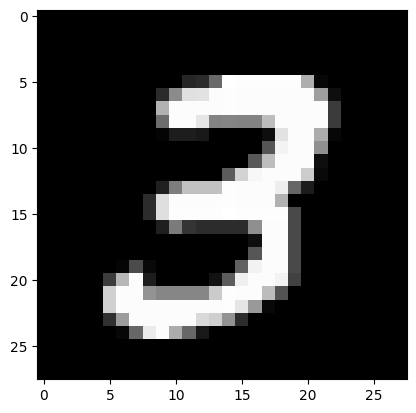

In [4]:
plt.imshow(train_X[7], cmap = 'gray')
print(train_y[7])

In [5]:
num_classes = 10

In [6]:
# Normalising the dataset

In [7]:
train_X = train_X/255
test_X = test_X/255
# max intensity of image is 255, therefore dividing by it.

In [8]:
# Every image is now scaled down form 0 to 1.

In [9]:
train_X[0].shape

(28, 28)

In [10]:
# We need to convert it to 3D image

In [11]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [12]:
train_X[0].shape

(28, 28, 1)

In [13]:
# Max intensity will get white only.

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
# Converting to vector.

In [16]:
# Now Model Making

In [17]:
img_shape = (28, 28, 1)

In [18]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [19]:
model = Sequential(name="ANN_MNIST")
# Flatten the input (28x28) to a vector of 784 features
model.add(Flatten(input_shape=(28, 28, 1)))  # No need to specify input_dim separately

# Add Dense layers
model.add(Dense(700, activation='relu', name='First_Layer'))
model.add(Dense(500, activation='relu', name='Second_Layer'))
model.add(Dense(250, activation='relu', name='Third_Layer'))
model.add(Dense(125, activation='relu', name='Fourth_Layer'))

# Output layer: Use softmax for multi-class classification (10 digits)
model.add(Dense(10, activation='softmax', name='Output_Layer'))


C:\Users\prajwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "ANN_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ First_Layer (Dense)                  │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Second_Layer (Dense)                 │ (None, 500)                 │         350,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Third_Layer (Dense)                  │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fourth_Layer (Dense)                 │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057,885 (4.04 MB)

 Trainable params: 1,057,885 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# For speed, we use Adam optimiser.
# Adam is Gradient Descent + Speed.

In [22]:
hist = model.fit(train_X, train_y, batch_size = 100, epochs = 20, validation_split = 0.1)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8734 - loss: 0.4151 - val_accuracy: 0.9700 - val_loss: 0.1039
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9731 - loss: 0.0869 - val_accuracy: 0.9748 - val_loss: 0.0813
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.9795 - val_loss: 0.0749
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9861 - loss: 0.0412 - val_accuracy: 0.9747 - val_loss: 0.0917
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9802 - val_loss: 0.0743
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9798 - val_loss: 0.0733
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9931 - loss: 0.0232 - val_accuracy: 0.9803 - val_loss: 0.0797
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9937 - loss: 0.0199 - 

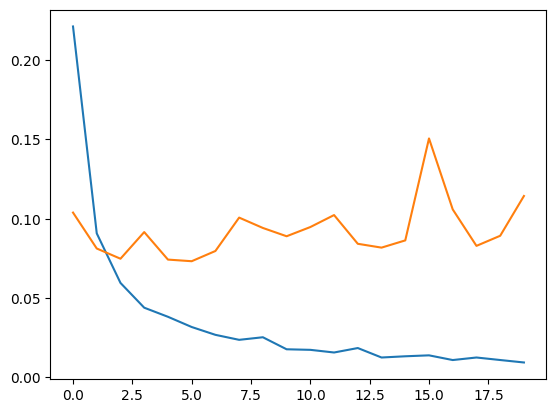

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

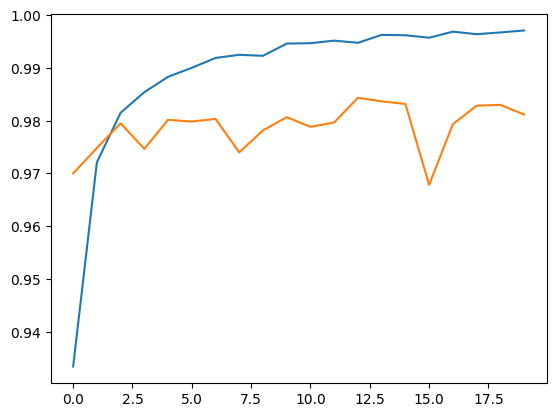

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [25]:
# Testing Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2


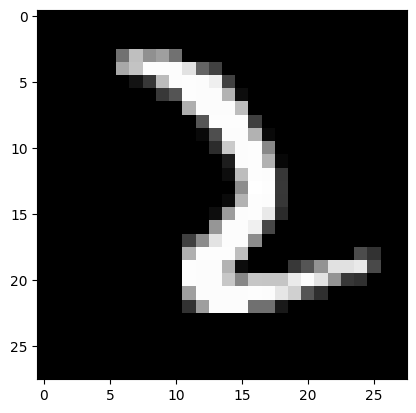

In [26]:
print(np.argmax(model.predict(test_X[653].reshape(1, 28, 28))))
plt.imshow(test_X[653], cmap = 'gray')

In [27]:
# Determining Accuracy
model.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.1571


[0.12633934617042542, 0.9787999987602234]